# "Average Sydney Suburb - Data processing in Pandas"


- toc: false
- branch: master
- badges: true
- comments: true
- categories: [jupyter]



## The Average Sydney Suburbs - Nationality edition

In this notebook, I want to investigate the multicultural background of Sydney suburbs and compare that to Sydney's overall composition. I intend to do this via resampling and calculating the associated p-value for every suburb. This will highlight the suburbs which are close to Sydney's overall composition (hence average) and those that are not average.

My hypothesis (which also sounds rather obvious) is that the multicultural ccomposition of most of Sydney's suburbs is not random, however I am also curious to see the suburbs where I cannot prove this.

In [this notebook](https://github.com/mindfire83/Average-Sydney-Suburb/blob/master/Average%20Sydney%20Suburb%20-%20Data%20Cleaning.ipynb) I cleaned the top 6 nationality data for Sydney. In this notebook, we will use the cleaned data sets to explore Sydney's average suburbs

### Part 1: Setting up the data

I have two datasets:  
-  Sydney's total population split by the top 6 Countries of birth of person (CBOP) and others
-  Population of each suburb in Sydney split by the top 6 CBOP and others

In this part, I want to setup the data so that I can get the 'Total Variation Distance' of each Suburb's nationality composition vs Sydney's nationality composition

In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_context('notebook')

In [24]:
#Reading the cleaned up data sets
sydney_cbop = pd.read_csv('Sydney_CBOP_Clean.csv')
suburb_cbop = pd.read_csv('Sydney_Suburb_CBOP_Clean.csv')

In [25]:
sydney_cbop.columns = ['CBOP', 'Population']
sydney_cbop.set_index('CBOP', inplace = True)
sydney_cbop

,Population
CBOP,
England,151617
Australia,2752123
China (excludes SARs and Taiwan),224682
India,130579
Vietnam,81041
New Zealand,86522
Others,1397432


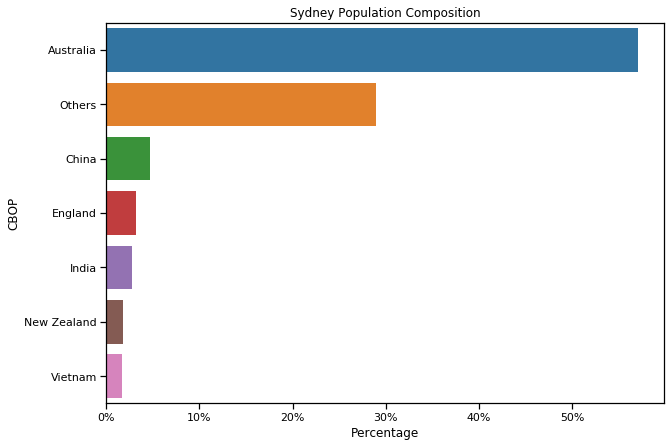

,Population,Percentage
CBOP,,
Australia,2752123,0.570507
Others,1397432,0.289683
China,224682,0.046576
England,151617,0.031430
India,130579,0.027069
New Zealand,86522,0.017936
Vietnam,81041,0.016800


In [26]:
#Lets start with exploring Sydney's overall population breakdown
sydney_cbop.sort_values('Population',ascending = False, inplace=True)
sydney_cbop.rename({'China (excludes SARs and Taiwan)': 'China'}, inplace = True)
#Calculate percentage of each Nationality
sydney_cbop['Percentage'] = sydney_cbop.Population/ sydney_cbop.Population.sum()
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x = sydney_cbop.Percentage * 100, y = sydney_cbop.index, data = sydney_cbop)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Sydney Population Composition')
plt.show()
display(sydney_cbop)

About 57% of the population in Sydney was born in Australia.

In [27]:
#Adding an ID column to the Sydney population dataframe. This will help ensure that I can align values correctly
#when I combine thisdata with the suburb populations
sydney_cbop['ID'] = sydney_cbop.reset_index().index
sydney_cbop

,Population,Percentage,ID
CBOP,,,
Australia,2752123,0.570507,0
Others,1397432,0.289683,1
China,224682,0.046576,2
England,151617,0.031430,3
India,130579,0.027069,4
New Zealand,86522,0.017936,5
Vietnam,81041,0.016800,6


In [28]:
#Lets now take a look at the Suburb nationality table
suburb_cbop.describe()

,Population
count,6251.000000
mean,771.674452
std,1849.102994
min,-3.000000
25%,11.000000
50%,77.000000
75%,474.000000
max,22907.000000


In [29]:
#We have a few cases where the Other population is < 0. We will need to set it to zero

suburb_cbop['Population'] = np.where(suburb_cbop['Population'] < 0,
                                    0,
                                    suburb_cbop['Population'])
#Checking for < 0 population. This should return an empty dataset
suburb_cbop[suburb_cbop.Population < 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CBOP        0 non-null      object 
 1   Suburb      0 non-null      object 
 2   Population  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 0.0+ bytes


In [30]:
#Cleaning the data a bit and setting suburb as the index
suburb_cbop.set_index('CBOP', inplace = True)
suburb_cbop.rename({'China (excludes SARs and Taiwan)': 'China'}, inplace = True)
suburb_cbop.reset_index(inplace = True)
suburb_cbop.set_index('Suburb', inplace = True)
suburb_cbop

,CBOP,Population
Suburb,,
Abbotsbury,England,40.0
Abbotsford (NSW),England,181.0
Acacia Gardens,England,63.0
Agnes Banks,England,23.0
Airds,England,46.0
...,...,...
Yellow Rock (Blue Mountains - NSW),Others,94.0
Yennora,Others,751.0
Yerranderie,Others,3.0


Next step is to get the composition for every suburb in Sydney. For this we will use Panda's groupby function with the transform function

_Note: Took me some time to figure this out. [This](https://pbpython.com/pandas_transform.html) was the best way that I found_

In [31]:
suburb_cbop.reset_index(inplace = True)
suburb_cbop['Percentage'] = suburb_cbop['Population']/suburb_cbop.groupby('Suburb').Population.transform('sum')
suburb_cbop

,Suburb,CBOP,Population,Percentage
0,Abbotsbury,England,40.0,0.009416
1,Abbotsford (NSW),England,181.0,0.033674
2,Acacia Gardens,England,63.0,0.016570
3,Agnes Banks,England,23.0,0.025584
4,Airds,England,46.0,0.015726
...,...,...,...,...
6246,Yellow Rock (Blue Mountains - NSW),Others,94.0,0.090211
6247,Yennora,Others,751.0,0.465304
6248,Yerranderie,Others,3.0,1.000000
6249,Yowie Bay,Others,349.0,0.113570


In [32]:
#Setting suburb as index
suburb_cbop.set_index('Suburb', inplace=True)
suburb_cbop

,CBOP,Population,Percentage
Suburb,,,
Abbotsbury,England,40.0,0.009416
Abbotsford (NSW),England,181.0,0.033674
Acacia Gardens,England,63.0,0.016570
Agnes Banks,England,23.0,0.025584
Airds,England,46.0,0.015726
...,...,...,...
Yellow Rock (Blue Mountains - NSW),Others,94.0,0.090211
Yennora,Others,751.0,0.465304
Yerranderie,Others,3.0,1.000000


## Part 2: Hypothesis testing on population varience

In this part, I will:  
1) Assume that overall Sydney's population composition would hold true for all suburbs  
2) For each suburb, I will draw samples from Sydney's population (sample size will be equal to suburbs's total population)  
3) Calculate the total variation distance (TVD) of the samples from Sydney's actual population composition. A total variation distance of 0 means that the nationality proportions are the same. Total variation distance is calculated using the absolute difference in population proportions which means that the minimum value is 0  
4) Compare the results to the actual observed population variation

My null hypothesis is that the population of every suburb is completely due to chance. Using the 4 steps above for every suburb will help determine if this hypothesis is true

First, lets start with one suburb to see how this works

In [33]:
test = suburb_cbop.loc['Artarmon'].join(sydney_cbop, on='CBOP', lsuffix="W")
test['Var'] = np.abs(test.PercentageW - test.Percentage)
display(test.sort_values(by='ID')) #using display to print a pretty version of the data frame
print("TVD between overall Sydney population and Artarmon population: ", test.Var.sum())
print("Artarmon's population: ", test.PopulationW.sum())

,CBOP,PopulationW,PercentageW,Population,Percentage,ID,Var
Suburb,,,,,,,
Artarmon,Australia,4428.0,0.465077,2752123,0.570507,0,0.105430
Artarmon,Others,3153.0,0.331163,1397432,0.289683,1,0.041479
Artarmon,China,924.0,0.097049,224682,0.046576,2,0.050473
Artarmon,England,314.0,0.032980,151617,0.031430,3,0.001550
Artarmon,India,455.0,0.047789,130579,0.027069,4,0.020720
Artarmon,New Zealand,183.0,0.019221,86522,0.017936,5,0.001285
Artarmon,Vietnam,64.0,0.006722,81041,0.016800,6,0.010078


TVD between overall Sydney population and Artarmon population:  0.23101455275608412
Artarmon's population:  9521.0


The current TVD of Artarmon's population compared to Sydney is 0.23. Next step would be to draw Artarmon's population sized samples based on *Sydney's* nationality breakdown. Then calculate the TVD of these samples and see how they compare to the actual TVD

In [37]:
#Extrating population percentages as numpy arrays for the multinomial distribution
Syd_pop_perc = sydney_cbop.Percentage.to_numpy()
Art_pop_perc = test.sort_values(by='ID').PercentageW.to_numpy()
Art_pop = test.PopulationW.sum()

#Generating 100000 multinomial samples of the size of Artarmon's population and Sydney's nationality breakdown 
#and dividing by Artarmon's population
samples = (np.random.multinomial(Art_pop,Syd_pop_perc, size = 100000))/Art_pop
#Calculating TVD
variations = np.abs(samples - Syd_pop_perc).sum(axis=1)
print("Average TVD: ", np.average(variations)) 
print("Standard Dev: ", np.std(variations))
variations.shape

Average TVD:  0.014365581508095708
Standard Dev:  0.005687543922900055


(100000,)

The observed TVD of 0.23 is mush higher than the sample average TVD. Lets plot these results to get a better idea of the difference

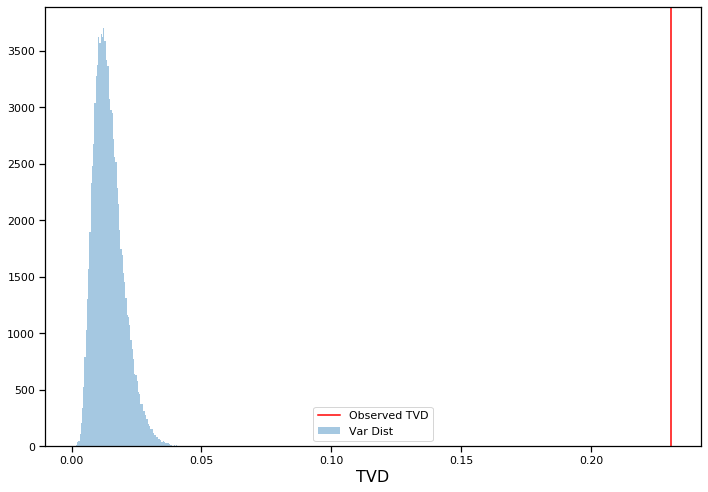

In [39]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(variations, bins=100, kde=False, label='Var Dist')
ax.set_xlabel("TVD",fontsize=16)
#ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(test.Var.sum(), color='red', label='Observed TVD')
plt.legend()
plt.tight_layout()
plt.show()


Based on the graph, it is clear that Artarmon's population breakdown is not due to a random placement. Lets now scale this process up for all of Sydney's suburbs (with a population size > 1000)
First I will create a dataframe with Suburb, total population, observed and sample TVD. Then I will write a function to calculate and fill in the observed and sample TVD for all suburbs

In [79]:
suburb_TVD = suburb_cbop.groupby(['Suburb']).sum()
#Excluding suburbs with population < 1000
suburb_TVD = suburb_TVD[suburb_TVD.Population >= 1000].copy()
#Add observed and sample TVD column and set to 0
suburb_TVD['observed_TVD'] = 0
suburb_TVD['sample_TVD'] = 0
suburb_TVD['sample_STD'] = 0

suburb_TVD.drop(['Percentage'], inplace=True, axis = 1)
suburb_TVD

,Population,observed_TVD,sample_TVD,sample_STD
Suburb,,,,
Abbotsbury,4248.0,0,0,0
Abbotsford (NSW),5375.0,0,0,0
Acacia Gardens,3802.0,0,0,0
Airds,2925.0,0,0,0
Alexandria,8253.0,0,0,0
...,...,...,...,...
Yarrawarrah,2731.0,0,0,0
Yellow Rock (Blue Mountains - NSW),1042.0,0,0,0
Yennora,1614.0,0,0,0


In [64]:
#There are probably faster ways to do this, but its late, im tired and I want to hit my target of the day
#So ill create a function to take in each suburb and calcualte the observed TVD and sample TVD of 100000 trials

def calculate_TVD(suburb_df, Syd_pop_perc = Syd_pop_perc):
    Sub_pop_perc = suburb_df.sort_values(by='ID').PercentageW.to_numpy()
    Sub_pop = suburb_df.PopulationW.sum()
    samples = (np.random.multinomial(Sub_pop,Syd_pop_perc, size = 100000))/Sub_pop
    #Calculating TVD
    variations = np.abs(samples - Syd_pop_perc).sum(axis=1)
    #returning observed and sample TVD and the sample standard deviation
    return np.abs(Sub_pop_perc - Syd_pop_perc).sum(), np.average(variations), np.std(variations)


In [65]:
#Testing the function with Artarmon
print(calculate_TVD(suburb_cbop.loc['Artarmon'].join(sydney_cbop, on='CBOP', lsuffix="W")))

(0.23101455275608415, 0.014353218703339833, 0.005699959579108245)


In [80]:
#Next step is to call this function for all suburbs in the suburb_TVD table
#and then fill in the actual and sample TVD values
for suburb in suburb_TVD.index:
    result = calculate_TVD(suburb_cbop.loc[suburb].join(sydney_cbop, on='CBOP', lsuffix="W"))
    suburb_TVD.loc[suburb, 'observed_TVD'] = result[0]
    suburb_TVD.loc[suburb, 'sample_TVD'] = result[1]
    suburb_TVD.loc[suburb, 'sample_STD'] = result[2]
display(suburb_TVD)

,Population,observed_TVD,sample_TVD,sample_STD
Suburb,,,,
Abbotsbury,4248.0,0.189052,0.021538,0.008537
Abbotsford (NSW),5375.0,0.134545,0.019082,0.007546
Acacia Gardens,3802.0,0.177846,0.022760,0.009045
Airds,2925.0,0.295935,0.025932,0.010273
Alexandria,8253.0,0.116368,0.015450,0.006120
...,...,...,...,...
Yarrawarrah,2731.0,0.590341,0.026858,0.010650
Yellow Rock (Blue Mountains - NSW),1042.0,0.583075,0.043546,0.017256
Yennora,1614.0,0.479971,0.034902,0.013820


In [82]:
#Calcualating deviations from mean for all suburbs
suburb_TVD['devs_from_mean'] = (suburb_TVD.observed_TVD - suburb_TVD.sample_TVD)/suburb_TVD.sample_STD
suburb_TVD.describe()

,Population,observed_TVD,sample_TVD,sample_STD,devs_from_mean
count,674.000000,674.000000,674.000000,674.000000,674.000000
mean,7038.764095,0.336198,0.021271,0.008422,43.871629
std,6213.960783,0.165464,0.008553,0.003385,32.473338
min,1003.000000,0.044193,0.006450,0.002564,2.406396
25%,2847.000000,0.198069,0.014487,0.005733,22.075065
50%,5098.000000,0.313934,0.019629,0.007766,35.218748
75%,9389.000000,0.477288,0.026286,0.010405,55.409502
max,47173.000000,1.057948,0.044156,0.017531,218.335893


In [83]:
display(suburb_TVD.sort_values(by='devs_from_mean'))

,Population,observed_TVD,sample_TVD,sample_STD,devs_from_mean
Suburb,,,,,
Mortlake (NSW),1062.0,0.084012,0.043002,0.017042,2.406396
Point Piper,1414.0,0.094179,0.037289,0.014770,3.851866
Summer Hill (Inner West - NSW),7303.0,0.044193,0.016425,0.006502,4.270783
Canada Bay,1246.0,0.107523,0.039757,0.015824,4.282415
North Willoughby,4176.0,0.061874,0.021679,0.008590,4.679585
...,...,...,...,...,...
Liverpool,27090.0,0.637732,0.008523,0.003364,187.015285
Sydney,17249.0,0.835058,0.010656,0.004209,195.874182
Parramatta,25798.0,0.731907,0.008734,0.003467,208.612084


From the calculation, it seems that most suburbs do not have a truly random population breakdown. Next, I will try to investigate this a bit more. Starting with a scatter plot of population and observed TVD

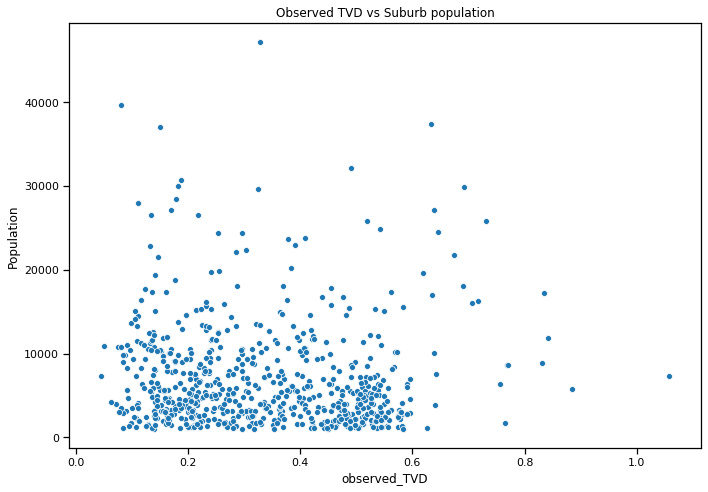

In [100]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=suburb_TVD, y="Population", x="observed_TVD")
ax.set_title('Observed TVD vs Suburb population')
plt.tight_layout()
plt.show()

I can observe no clear trend here. Intutively these results makes sense. I can highlight the the following reasons:  
- There are no policies in place in Sydney to manage population compositions in locations
- This is not a truly independent distribution as I have assumed for eg: it is highly likely that 1 person of a particular nationality is married to a person of the same nationality  
- Anecdotally, a clustering behaviour is observed in Sydeny (eg: Vietnames concentration on Cabramatta). Th

Total suburb population numbers point to a clusterng behaviour for groups of people from the same country/back g